In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 料理名に自作辞書の言葉を含むかでつくレポ数に対し回帰分析を行う

つくレポ数が少ないと分析できないので、2001以降のデータを用いる。
全て連結したデータを作る。データ数が大きくなりすぎるので不安である。

In [3]:
year = []
for i in range(2001, 2015):
    year.append(i)

report_recipe_id = pd.DataFrame()
for i in year:
    temp = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/report 2/report{i}.csv", names=["recipe_id"], usecols=[0])
    report_recipe_id = pd.concat([report_recipe_id, temp])

value_count = report_recipe_id["recipe_id"].value_counts()
df_value_count = pd.DataFrame(value_count, columns=["recipe_id", "qty"])
df_value_count["qty"] = df_value_count["recipe_id"]
df_v = pd.DataFrame({"recipe_id":df_value_count.index, "qty":df_value_count["qty"]})
df_v.reset_index(drop=True, inplace=True)

In [4]:
recipe = pd.DataFrame()
for i in year:
    temp = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/recipe/recipe{i}.csv", names=["recipe_id", "dish_name"], usecols=[0, 2])
    recipe = pd.concat([recipe, temp])

In [5]:
df = pd.merge(recipe, df_v, on="recipe_id", how="left")
df.fillna(0, inplace=True)

In [6]:
dictionary = ["秘密", "我が家", "定番", "絶品", "美味", "簡単", "本格", "レンジ", "旨", "不要", "♪", "♡", "☆", "〜", "！", "弁当", "HM", "HB", "キャラ", "フライパン", "風", "サラダ", "パスタ", "チーズ", "トマト", "ケーキ", "パン", "スープ", "カレー", "卵", "豆腐"]

for i in dictionary:
    df[i] = 0

In [7]:
length = len(df)
for i in range(length):
    name = str(df["dish_name"][i])
    if ("秘密" in name) or ("ひみつ" in name) or ("ヒミツ" in name):
        df["秘密"][i] = 1
    if ("我が家" in name) or ("おうち" in name) or ("ウチ" in name):
        df["我が家"][i] = 1
    if ("定番" in name) or ("基本" in name):
        df["定番"][i] = 1
    if "絶品" in name:
        df["絶品"][i] = 1
    if ("美味" in name) or ("おいしい" in name):
        df["美味"][i] = 1
    if "簡単" in name:
        df["簡単"][i] = 1
    if "本格" in name:
        df["本格"][i] = 1
    if "レンジ" in name:
        df["レンジ"][i] = 1
    if ("旨" in name) or ("ウマ" in name):
        df["旨"][i] = 1
    if ("不要" in name) or ("不必要" in name) or ("無し" in name):
        df["不要"][i] = 1
    if "♪" in name:
        df["♪"][i] = 1
    if ("♡" in name) or ("❤" in name):
        df["♡"][i] = 1
    if ("☆" in name) or ("✿" in name):
        df["☆"][i] = 1
    if "〜" in name:
        df["〜"][i] = 1
    if "！" in name:
        df["！"][i] = 1
    if "弁当" in name:
        df["弁当"][i] = 1
    if "HM" in name:
        df["HM"][i] = 1
    if "HB" in name:
        df["HB"][i] = 1
    if "キャラ" in name:
        df["キャラ"][i] = 1
    if "フライパン" in name:
        df["フライパン"][i] = 1
    if "風" in name:
        df["風"][i] = 1
    if "サラダ" in name:
        df["サラダ"][i] = 1
    if "パスタ" in name:
        df["パスタ"][i] = 1
    if "チーズ" in name:
        df["チーズ"][i] = 1
    if "トマト" in name:
        df["トマト"][i] = 1
    if "ケーキ" in name:
        df["ケーキ"][i] = 1
    if ("パン" in name) and ("フライパン" not in name):
        df["パン"][i] = 1
    if "スープ" in name:
        df["スープ"][i] = 1
    if "カレー" in name:
        df["カレー"][i] = 1
    if "卵" in name:
        df["卵"][i] = 1
    if "豆腐" in name:
        df["豆腐"][i] = 1

In [12]:
df

,recipe_id,dish_name,qty,秘密,我が家,定番,絶品,美味,簡単,本格,...,サラダ,パスタ,チーズ,トマト,ケーキ,パン,スープ,カレー,卵,豆腐
0,a98b82b685edf58c48f486798fa0a7c42cfea8fa,ホワイトベリー☆チーズケーキ,0.0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,abbdd475ac90a37c7c71ca1709c3dad863b26f45,お寿司やさんの出し巻き卵,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,5ffed2c3f23326f07c9dbb5f4912e6a39fdef8c5,ラーメンに合う我が家の煮豚,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,c53264e3219f085e7c91cacb0c375f7ced53f1df,筑前煮,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,bd000d838c3feb47b0c3d4c49fbdb8b02822a39b,いかすみチャーハン,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710572,88c47447dd9bee0771af46e2741b40671bdab54c,冷めても固くならない！ポークチーズピカタ,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1710573,52d390021ca1fa5b55bde61f8ec26f0bbba35daa,栗みたいなさつまいも,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1710574,b7890125f630e1a3d3f2ae1d54922ac8ac129b6f,チョコポッキー★,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1710575,b1f989cfe218ba069f4649169ab913f5bd3e4489,10分で完成！ツナと青菜のクリームパスタ,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [82]:
df.to_csv("dish_name_words.csv")

## 重回帰分析から始める

In [14]:
import seaborn as sns

In [25]:
cols = df.head().iloc[:,3:].columns

In [26]:
print(cols)

Index(['秘密', '我が家', '定番', '絶品', '美味', '簡単', '本格', 'レンジ', '旨', '不要', '♪', '♡',
       '☆', '〜', '！', '弁当', 'HM', 'HB', 'キャラ', 'フライパン', '風', 'サラダ', 'パスタ',
       'チーズ', 'トマト', 'ケーキ', 'パン', 'スープ', 'カレー', '卵', '豆腐'],
      dtype='object')


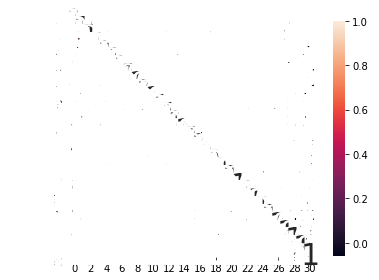

In [29]:
# 相関行列を表示する
cm = np.corrcoef(df.iloc[:,3:].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size':30})
plt.tight_layout()
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [51]:
x = df.iloc[:,3:].values
y = df["qty"].values
"""
説明変数xは全てダミー変数なので標準化をする必要がない
sc_x = StandardScaler()
x_std = sc_y.fit_transform(x)
"""
sc_y = StandardScaler()
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegression()
lr.fit(x, y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# 決定係数を求め、モデルの当てはまりを確認する
print("決定係数R^2:", lr.score(x, y_std))
print("くそです。")

決定係数R^2: 0.0023452134067502017
くそです。


In [81]:
lr.coef_

array([ 0.66291852,  0.02367518,  0.12050469,  0.08194215,  0.03685815,
        0.02822106,  0.07319978,  0.01764885,  0.10790825,  0.0453037 ,
        0.05217876,  0.11686605,  0.04400613, -0.00316246,  0.02079435,
        0.04543455,  0.18271662,  0.11073706,  0.01650847,  0.09270593,
       -0.00401835, -0.00270724, -0.02284188,  0.00427751, -0.00953137,
        0.02343962,  0.01632983, -0.01281408, -0.02837962,  0.06447423,
        0.02216499])

実際に用いるのは数個の限られた単語なので、スパース性を持たせるためリッジ回帰を用いる

In [54]:
from sklearn.linear_model import Ridge

In [65]:
n_alphas = 200
alphas = np.logspace(-1, 7, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x, y_std)
    coefs.append(ridge.coef_)

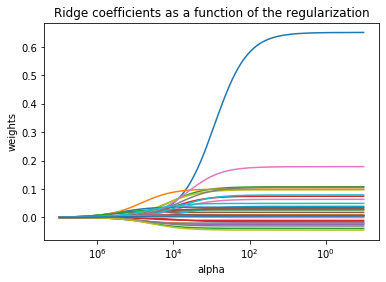

In [66]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

あ、そういえばリッジ回帰はスパース性あんまないんや。スパース性あるのはラッソ回帰や。ごっちゃになってた。

てことでラッソ回帰に切り替えます。

In [67]:
from sklearn.linear_model import Lasso

In [70]:
n_alphas = 200
alphas = np.logspace(-9, -1, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(x, y_std)
    coefs.append(lasso.coef_)

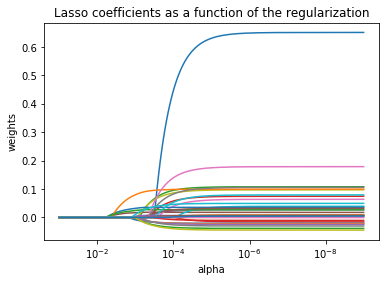

In [71]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

罰則項の係数は10^(-4)が妥当か。

In [78]:
lasso_adjusted = Lasso(alpha=10**(-3))
results = lasso_adjusted.fit(x, y_std)

In [79]:
print(results.score(x, y_std))

0.0014162835188809007


In [80]:
print(results.coef_)

[ 0.          0.          0.          0.          0.          0.02572053
  0.          0.          0.          0.          0.04670844  0.09521633
  0.03993568  0.          0.01754684  0.          0.          0.
  0.          0.         -0.         -0.         -0.          0.
 -0.          0.00515087  0.000665   -0.         -0.          0.02297556
  0.        ]
